In [1]:
# 필요한 패키지 불러오기 + 동일한 결과를 반복할 수 있도록 랜덤시드 지정
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 랜덤 시드 고정시키기
np.random.seed(3)

In [3]:
from PIL import Image
import os.path

targerdir = r"C:\\vsCode\\PillProject\\imageT\\color\\train1" #해당 폴더 설정 

files = os.listdir(targerdir)

format = [".jpg",".png",".jpeg","bmp",".JPG",".PNG","JPEG","BMP"] #지원하는 파일 형태의 확장자들
for (path,dirs,files) in os.walk(targerdir):
    for file in files:
         if file.endswith(tuple(format)):
             image = Image.open(path+"\\"+file)
             print(image.filename)
             print(image.size)

             image=image.resize((24, 24))
             image.save(path+"\\"+file)
             print(image.size)

         else:
             print(path)
             print("InValid",file)

targerdir = r"C:\\vsCode\\PillProject\\imageT\\color\\test1" #해당 폴더 설정 

files = os.listdir(targerdir)

format = [".jpg",".png",".jpeg","bmp",".JPG",".PNG","JPEG","BMP"] #지원하는 파일 형태의 확장자들
for (path,dirs,files) in os.walk(targerdir):
    for file in files:
         if file.endswith(tuple(format)):
             image = Image.open(path+"\\"+file)
             print(image.filename)
             print(image.size)

             image=image.resize((24, 24))
             image.save(path+"\\"+file)
             print(image.size)

         else:
             print(path)
             print("InValid",file)

C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill0.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill0.PNG
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill0_1.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill0_1.PNG
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill74_1.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill76.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill76_1.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill77.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill77_1.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill78-1.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill78.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProject\\imageT\\color\\train1\blue\pill79.jpg
(24, 24)
(24, 24)
C:\\vsCode\\PillProj

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
                'C:\\vsCode\\PillProject\\imageT\\color\\train1',
                target_size = (24, 24),
                batch_size = 3,
                class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                'C:\\vsCode\\PillProject\\imageT\\color\\test1',
                target_size = (24, 24),
                batch_size = 3,
                class_mode = 'categorical')

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [5]:
# 모델 만들기
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), 
                 padding = 'valid',
                 activation = 'relu',
                 input_shape = (24, 24, 3)))
model.add(Conv2D(64, (3, 3), 
                 padding = 'valid',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

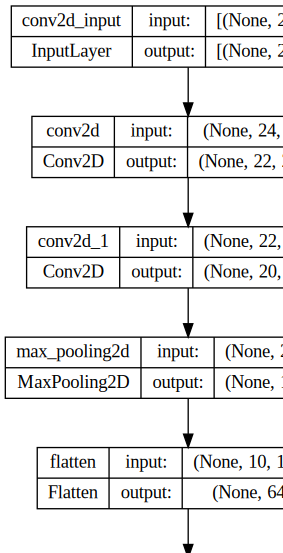

In [6]:
# 모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [7]:
# 모델 학습과정 설정하기
# loss : 현재 가중치 세트를 평가하는데 사용할 손실함수, 다중클래스이므로 categorical_crossentropy 로 지정합니다.
# optimizer : 최적의 가중치를 검색하기 위한 알고리즘으로 경사하강법 알고리즘 중 하나인 adam 을 사용합니다.
# metrics : 평가 척도를 나타내며 분류문제에서는 일반적으로 accuracy 로 지정합니다.

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [8]:
# 케라스에서 모델을 학습시킬 때, 주로 fit( ) 함수를 사용하지만, 제네레이터로 생성된 배치로 학습시킬 경우에는 
# fit_generator( ) 함수를 사용합니다.
# 첫 번째 인자 : 훈련 데이터셋을 제공할 제네레이터를 지정

# steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 
# 총 45개의 훈련용 샘플이 있고, 
# 배치 사이즈가 3이므로 15 스텝으로 지정합니다.

# epochs : 전체 훈련 데이터셋에 대한 반복 학습횟수를 지정합니다. 총 50번을 반복하겠습니다.

# validation_data : 검증 데이터셋을 제공할 제네레이터를 지정합니다.

# validation_steps : 한 epoch 종료 시마다 검증할 검증 스텝 수를 지정합니다. 
# 총 15개의 검증 샘플이 있고, 배치사이즈 3이므로 5 스텝으로 지정합니다.
model.fit(
        train_generator,
        steps_per_epoch = 15, 
        epochs = 30,
        validation_data = test_generator,
        validation_steps = 5)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\rlawn\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\rlawn\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rlawn\AppData\Local\Temp\ipykernel_12224\2022320029.py", line 15, in <cell line: 15>
      model.fit(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\backend.py", line 5535, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[3,3] labels_size=[3,5]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_812]